In [ ]:
from Datapreparation import *
import warnings
warnings.filterwarnings("ignore")
from models import *
from satellite_eda import *
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

In [2]:
satellites = {
    "fengyunD": ("./orbital_elements/Fengyun-2D.csv", "./manoeuvres/manFY2D.txt.FY"), 
    "fengyunE": ("./orbital_elements/Fengyun-2E.csv", "./manoeuvres/manFY2E.txt.FY"),
    "fengyun4A": ("./orbital_elements/Fengyun-4A.csv", "./manoeuvres/manFY4A.txt.FY")
}

arima_grid = {'p': [0,1,2], 'q': [0,1,2], 'd': [0,1]}

xgb_grid   = {
    'n_lags':     [90, 180, 360],
    'n_estimators':[3, 5],
    'max_depth':  [3, 5],
    'colsample_bytree': [0.5, 0.7],
    'learning_rate': [0.001, 0.01, 0.05]
}

buffers = [1,2,3]  # days

In [5]:
def optimized_search(satellite, arima_grid, xgb_grid, buffer=3):
    arima = ARIMAModel(satellite)
    arima.grid_search(arima_grid, buffer)
    print("ARIMA best params:", arima.best_params, "pr_auc:", arima.eval_results['pr_auc'])

    xgb = XGBoostModel(satellite, brouwer_only=True)
    xgb.grid_search(xgb_grid, buffer)
    print("XGB best params:", xgb.best_params, "pr_auc:", xgb.eval_results['pr_auc'])
    return arima, xgb

def plot(satellite, buffers):
    plt.figure(figsize=(8, 6))
    arima = satellite.arima
    xgb = satellite.xgb
    for buffer in buffers:
        arima.evaluate(buffer)
        eval_res = arima.eval_results  
        plt.plot(eval_res['recalls'], eval_res['precisions'], label=f"{arima.name} (buffer={buffer})")

        xgb.evaluate(buffer)
        eval_res2 = xgb.eval_results  
        plt.plot(eval_res2['recalls'], eval_res2['precisions'], label=f"{xgb.name} (buffer={buffer})")

    plt.title(f"Precision–Recall Curves")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Loading dataset FY2D Ready.
--------------------------------------------FY2D---------------------------------------------------
ARIMA best params: {'p': 2, 'q': 2, 'd': 1} pr_auc: 0.7127219074480527
XGB best params: {'n_lags': 90, 'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7} pr_auc: 0.4662738620516852


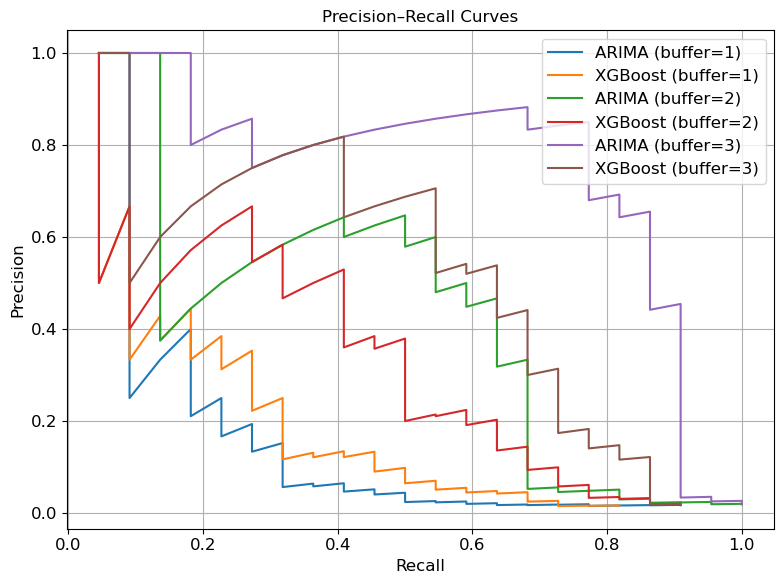

-----------------------------------------------------------------------------------------------------------



Loading dataset FY2E Ready.
--------------------------------------------FY2E---------------------------------------------------
ARIMA best params: {'p': 0, 'q': 2, 'd': 1} pr_auc: 0.6641767014711638
XGB best params: {'n_lags': 90, 'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7} pr_auc: 0.27675583554147876


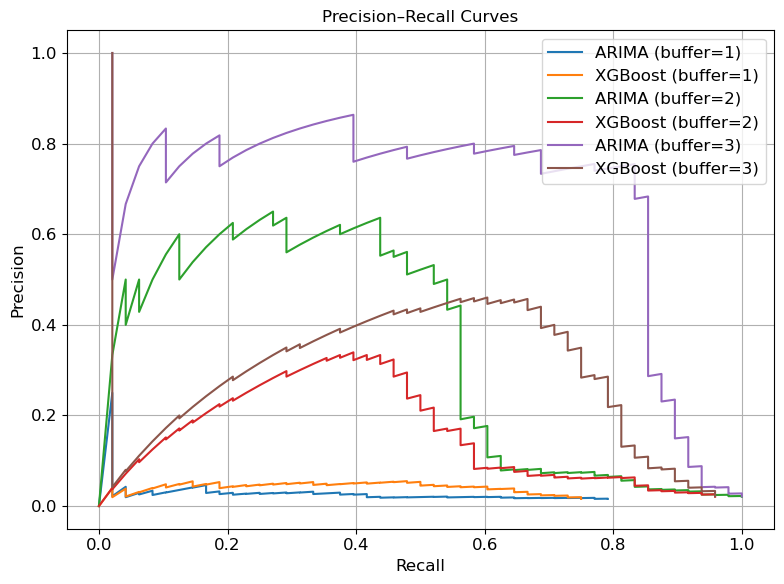

-----------------------------------------------------------------------------------------------------------



Loading dataset FY4A Ready.
--------------------------------------------FY4A---------------------------------------------------
ARIMA best params: {'p': 2, 'q': 2, 'd': 0} pr_auc: 0.44480403728193313
XGB best params: {'n_lags': 90, 'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5} pr_auc: 0.48901292260245577


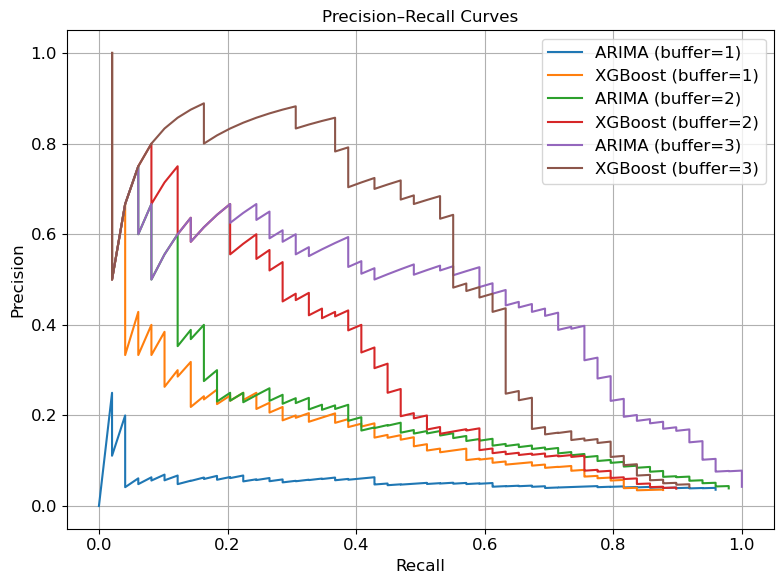

-----------------------------------------------------------------------------------------------------------





In [6]:
for name, path in satellites.items():
    sate = Satellite(path[0], path[1])
    print(f"--------------------------------------------{sate.name}---------------------------------------------------")
    optimized_search(sate, arima_grid, xgb_grid)
    plot(sate, buffers)
    print("-----------------------------------------------------------------------------------------------------------")
    print()
    print()
    print()